In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', UserWarning)
import os,sys,re
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
read_path = '/home/mckc/Face oNN/Complete Face Data/'
#read_path = '/home/mckc/Face oNN/Complete Face Data/'
save_path = '/home/mckc/latest/'
os.chdir(read_path)
os.getcwd()

'/home/mckc/Face oNN/Complete Face Data'

In [2]:
folders = os.listdir(os.getcwd())

In [3]:
def PCA_comp(data):
    from time import *
    from sklearn.decomposition import PCA
    n_components = 150
    
    h,w = 96,96

    print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, image_data.shape[0]))
    t0 = time()
    pca = PCA(n_components=n_components, whiten=True).fit(images_geq)
    print("done in %0.3fs" % (time() - t0))

    #eigenfaces = pca.components_.reshape((n_components, h, w))

    print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    X = pca.transform(data)
    print X.shape
    print("done in %0.3fs" % (time() - t0))
    return(X)

<ipython-input-3-010fc55b4022>:1: SyntaxWarning: import * only allowed at module level
  def PCA_comp(data):


In [4]:
#K-mediods file
import numpy as np
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')
    # randomly initialize an array of k medoid indices
    M = np.arange(n)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in xrange(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

# return results
    return M, C

In [5]:
folder = folders[10]
folder

'Praba'

In [6]:
import cv2
from cv2 import resize
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank
selem = disk(30)
size = []
images_geq = []
images_eql = []
images = []

os.chdir(read_path+folder)
files = os.listdir(read_path+folder)
#files = os.listdir(read_path)

In [7]:
for i in files:
    image = resize(cv2.imread(i,0),(96,96))
    #image = cv2.imread(i,0)
    # Global equalize
    image_g_eq = exposure.equalize_hist(image)

    # Equalization
    image_eql = rank.equalize(image, selem=selem)
    images.append(image)
    images_geq.append(image_g_eq)
    images_eql.append(image_eql)
    size.append(image.shape[0])
size = np.array(size)
image_data = np.array(images).reshape(-1,9216)
images_geq = np.array(images_geq).reshape(-1,9216)
images_eql = np.array(images_eql).reshape(-1,9216)
X  = PCA_comp(images_geq)
X.shape

Extracting the top 150 eigenfaces from 164 faces
done in 0.166s
Projecting the input data on the eigenfaces orthonormal basis
(164, 150)
done in 0.052s


(164, 150)

In [1]:
import warnings
#warnings.simplefilter("ignore")
warnings.filterwarnings("ignore",category=ImportWarning) #DeprecationWarning

In [1]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d,upsample_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
from tflearn.data_utils import  to_categorical
import tensorflow as tf
tf.reset_default_graph()


#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=2)

####
encoder = input_data(shape=[None, 96, 96, 1], name='input')

encoder = conv_2d(encoder, 32, 3, activation='relu' ,padding='same')
encoder = conv_2d(encoder, 64, 3, activation='relu',padding='same')
encoder = max_pool_2d(encoder, 2,padding='same')


encoder = conv_2d(encoder, 64, 3, activation='relu',padding='same')
encoder = conv_2d(encoder, 128, 3, activation='relu',padding='same')
encoder = max_pool_2d(encoder, 2,padding='same')

encoder = conv_2d(encoder, 128, 3, activation='relu',padding='same')
encoder = conv_2d(encoder, 192, 3, activation='relu',padding='same')
encoder = max_pool_2d(encoder, 2,padding='same')

encoder = conv_2d(encoder, 256, 3, activation='relu',padding='same')
encoder = max_pool_2d(encoder, 2,padding='same')

encoder = conv_2d(encoder, 128, 3, activation='relu',padding='same')
encoder = max_pool_2d(encoder, 2,padding='same')

#encoder = flatten(encoder, name='Flatten')

#decoder = reshape(encoder, (-1,256,3,3), name='Reshape')
decoder = conv_2d(encoder, 128, 3, activation='relu',padding='same')
decoder = upsample_2d(decoder, 2)

decoder = conv_2d(decoder, 256, 3, activation='relu',padding='same')
decoder = upsample_2d(decoder, 2)

decoder = conv_2d(decoder, 192, 3, activation='relu',padding='same')
decoder = conv_2d(decoder, 128, 3, activation='relu',padding='same')
decoder = upsample_2d(decoder, 2)

decoder = conv_2d(decoder, 128, 3, activation='relu',padding='same')
decoder = conv_2d(decoder, 64, 3, activation='relu',padding='same')
decoder = upsample_2d(decoder, 2)

decoder = conv_2d(decoder, 64, 3, activation='relu',padding='same')
decoder = conv_2d(decoder, 32, 3, activation='relu',padding='same')
decoder = upsample_2d(decoder, 2)

decoder = conv_2d(decoder, 1, 3, activation='sigmoid',padding='same')
net = tflearn.regression(decoder, optimizer='adam', learning_rate=0.0001,
                         loss='mean_square', metric=None)

# Training the auto encoder
print('initialising')
model = tflearn.DNN(net, tensorboard_verbose=1,tensorboard_dir='/home/mckc/tf_logs')
#model.load('/home/mckc/cluster.tflearn')

initialising
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
Instructions for updating:
Please switch to tf.summary.histogram. Note that tf.summary.histogram uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on their scope.
Instructions for updating:
Please switch to tf.summary.histogram. Note that tf.summary.histogram u

In [9]:
print('started')
model.fit( images_geq.reshape(-1,96,96,1), images_geq.reshape(-1,96,96,1), n_epoch=5, validation_set=0.1,
          run_id="auto_encoder_cnn", batch_size=200)
#encoding_model = tflearn.DNN(encoder, session=model.session)

Training Step: 4  | total loss: 0.08294
| Adam | epoch: 004 | loss: 0.08294 | val_loss: 0.08259 -- iter: 147/147
Training Step: 4  | total loss: 0.08294
| Adam | epoch: 004 | loss: 0.08294 | val_loss: 0.08259 -- iter: 147/147
--


KeyboardInterrupt: 

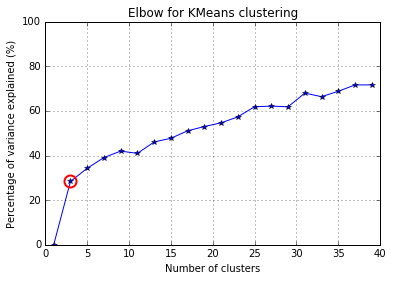

In [98]:
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist

##### cluster data into K=1..20 clusters #####
K_MAX = 40
KK = range(1,K_MAX,2)

KM = [kmeans(X[:,:],k,iter=50) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(X[:,:], cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

tot_withinss = [sum(d**2) for d in dist]  # Total within-cluster sum of squares
totss = sum(pdist(X)**2)/X.shape[0]       # The total sum of squares
betweenss = totss - tot_withinss      

##### plots #####
kIdx = 1        # K=10
# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(KK, betweenss/totss*100, 'b*-')
ax.plot(KK[kIdx], betweenss[kIdx]/totss*100, marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')

In [100]:
from sklearn.metrics.pairwise import pairwise_distances
D = pairwise_distances(X, metric='euclidean')

# split into 2 clusters
M, C = kMedoids(D, 25)
cleaned = image_data[M,].reshape(-1,96,96)

os.chdir(save_path+folder)
import scipy.misc
for i in range(cleaned.shape[0]):
    scipy.misc.toimage(cleaned[i]).save(str(folder+'_'+str(i)) +'.jpg')
os.chdir(read_path)

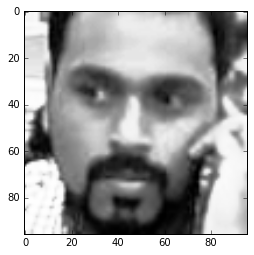

In [88]:
plt.imshow(images_geq[M[4],].reshape(96,96),cmap=cm.Greys_r)

In [13]:
save_path

'/home/mckc/clust/'

In [14]:
folder

'clust'